In [1]:
from sys import maxsize
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from log_reg_utils import sigmoid, plot_sep

In [2]:
iris_dataset = datasets.load_iris()
raw_features = iris_dataset.data
y = iris_dataset.target
raw_features.shape, y.shape

((150, 4), (150,))

The first two classes in the iris dataset are linearly-separable. For demo purpose here,<br>
- take only those two classes to show linear separation in a plot.
- take only 2 features to show linear separation in a 2D feature space.
- take samples in columns for convention.

In [3]:
X = raw_features[0:100, 0:2].T
y = y[0:100]
X.shape, y.shape

((2, 100), (100,))

Visually observe the linearly-separable data set before searching for parameters w.

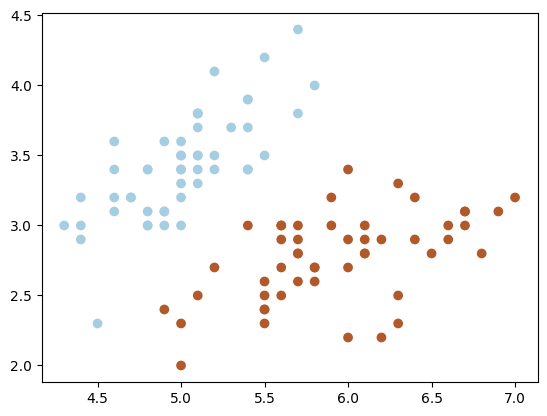

In [4]:
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Paired)

#### Feature Transformation

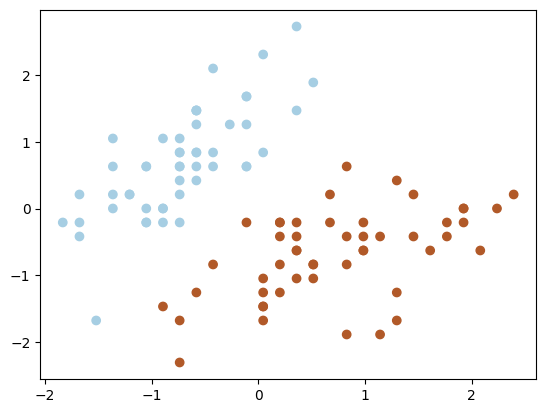

In [5]:
scaler = StandardScaler()
scaler.fit(X.T)
X = scaler.transform(X.T).T
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Paired)

Furthermore, we also want to add a bias term to the training samples.

In [6]:
x_0 = np.array([1.0] * X.shape[1])
x_0 = x_0.reshape((1, 100))
x_0.shape

(1, 100)

In [7]:
X = np.vstack((x_0, X))
X.shape

(3, 100)

#### Batch Gradient Descent on Negative Log Likelihood

In [8]:
tr_neg_LL = []
test_neg_LL = []
stopping_criteria = 0.0000001
lr = 0.00001
w = np.array([[0.0, -1.0, -1.0]]).T
w

array([[ 0.],
       [-1.],
       [-1.]])

Before training, let us observe the decision boundary in feature space.

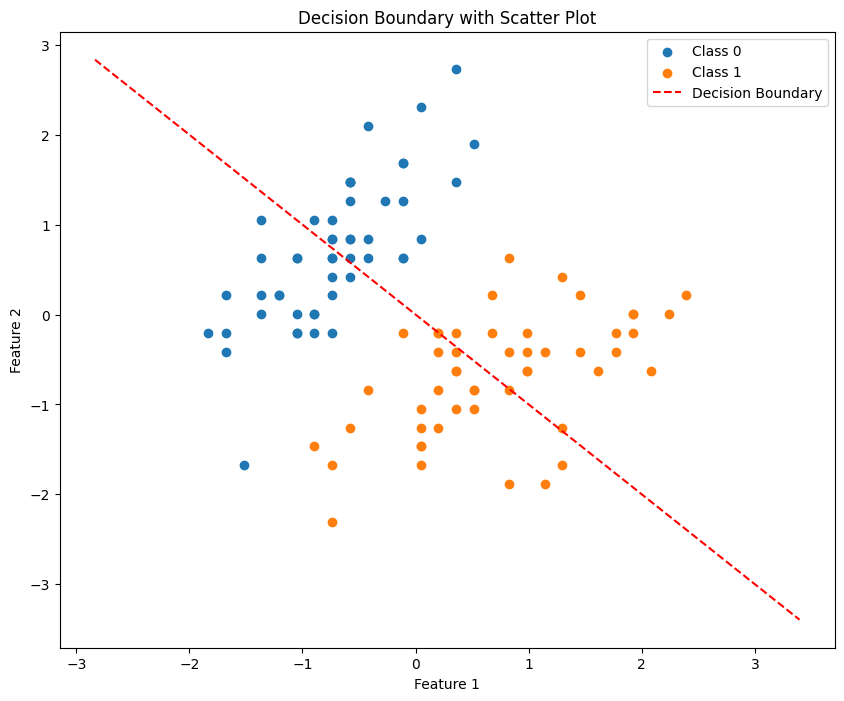

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def plot_sep(feature_1, feature_2, labels, w0=0, w1=1, w2=1):
    plt.figure(figsize=(10, 8))

    # Plot samples of different classes with different colors
    unique_labels = np.unique(labels)
    for label in unique_labels:
        class_mask = labels == label
        plt.scatter(
            feature_1[class_mask],
            feature_2[class_mask],
            marker="o",
            label=f"Class {label}",
        )

    # Plot the decision boundary line based on the coefficients (w0 + w1 * x + w2 * y = 0)
    x_vals = np.linspace(feature_1.min() - 1, feature_1.max() + 1, 100)
    y_vals = (-w0 - w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, color="r", linestyle="--", label="Decision Boundary")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Decision Boundary with Scatter Plot")
    plt.show()


plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=w[0].item(),
    w1=w[1].item(),
    w2=w[2].item(),
)

Training

In [10]:
dE_by_dw = w  # set to an arbitrary value with the same dims as dE_by_dw
epochs = 1000000
ep = 0
while np.linalg.norm(dE_by_dw, ord=1) > stopping_criteria:
    dE_by_dw = (1 / len(y)) * np.dot(
        X, (sigmoid(np.dot(X.T, w) - y.reshape((len(X[0, :]), 1))))
    )
    w = w - lr * dE_by_dw

    # if ep % 500 == 0:
    #     print("w ", w)
    ep += 1

w

KeyboardInterrupt: 

In [12]:
w

array([[-21.93167238],
       [ -1.82244923],
       [ -1.3462322 ]])

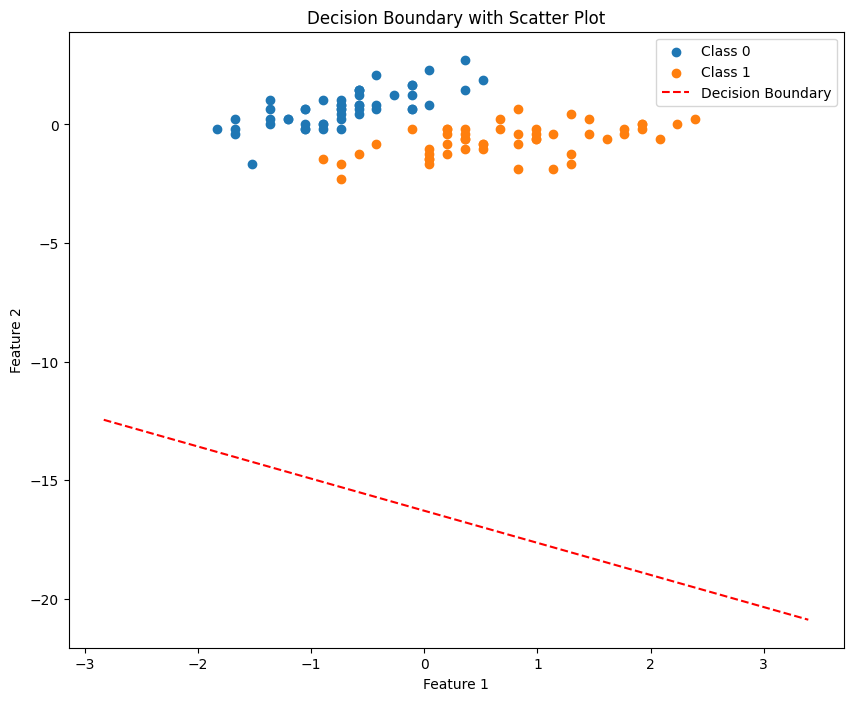

In [11]:
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=w[0].item(),
    w1=w[1].item(),
    w2=w[2].item(),
)

Plot decision boundary after training.

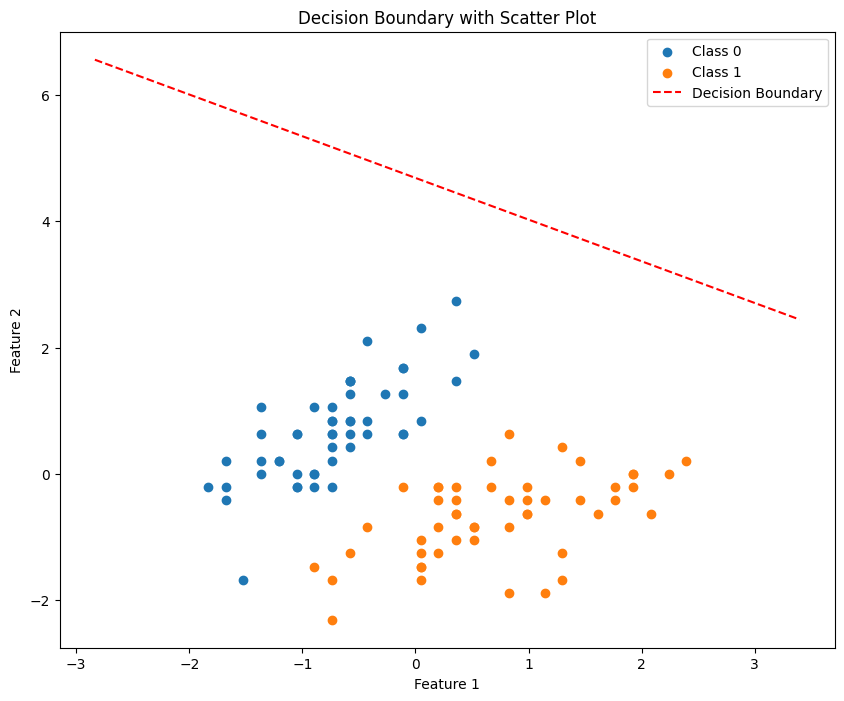

In [18]:
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=w[0].item(),
    w1=w[1].item(),
    w2=w[2].item(),
)

In [42]:
np.dot(X.T, w).shape

(100, 1)

In [46]:
w - lr * (1 / len(y)) * np.dot(
    X, (sigmoid(np.dot(X.T, w) - y.reshape((len(X[0, :]), 1))))
)

array([[0.9999542 ],
       [2.00000833],
       [4.00003263]])